In [1]:
#https://www.zybuluo.com/hanbingtao/note/476663
#手写数字识别

#数据下载
# from tensorflow.examples.tutorials.mnist import input_data
# mnist=input_data.read_data_sets('/tmp/',one_hot=True)
#或者：download:http://yann.lecun.com/exdb/mnist/

#文件路径
import os

base_path='/Users/yexianyong/Downloads/machine_learning/mnist'
training_images_path=os.path.join(base_path,'train-images-idx3-ubyte')
training_labels_path=os.path.join(base_path,'train-labels-idx1-ubyte')
test_images_path=os.path.join(base_path,'t10k-images-idx3-ubyte')
test_labels_path=os.path.join(base_path,'t10k-labels-idx1-ubyte')

training_images_path

'/Users/yexianyong/Downloads/machine_learning/mnist/train-images-idx3-ubyte'

In [2]:
#读取文件
#http://blog.csdn.net/simple_the_best/article/details/75267863
import struct
import numpy as np

def load_mnist(images_path,labels_path,kind='train'):
    """Load MNIST data from path"""
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)

    return images, labels
images,labels=load_mnist(training_images_path,training_labels_path)
images,labels

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

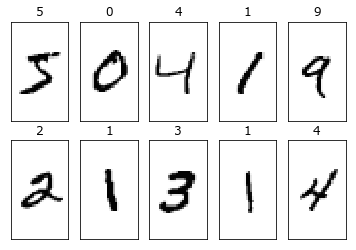

In [3]:
#可视化
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=2,ncols=5,sharex=True,sharey=True)

ax = ax.flatten()
for i in range(10):
    img = images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(labels[i])
    
ax[0].set_xticks([])
ax[0].set_yticks([])

plt.show()

In [4]:
#构造训练相关数据
#给images添加bias：1

#inputs
inputs=np.zeros((images.shape[0],images.shape[1]+1))
inputs[:,0:1]=1
inputs[:,1:]=images[:,:]

inputs

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [5]:
#超参数确定
#Three layers
#input layer nodes:785个(已添加bias)
#hidden layer nodes:301个(已添加bias)
#output layer nodes:10个

#weights不能为0
w12=np.random.uniform(-0.1,0.1,(300,inputs.shape[1]))
w23=np.random.uniform(-0.1,0.1,(10,301))

#学习率
µ=0.1

w12.shape,len(w12),w23.shape

((300, 785), 300, (10, 301))

In [37]:
#计算
#激活函数sigmoid
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def get_result(vec):
    max_value_index = 0
    max_value = 0
    for i in range(len(vec)):
        if vec[i] > max_value:
            max_value = vec[i]
            max_value_index = i
    return max_value_index
 

for x,y in zip(inputs[0:1],labels[0:1]):
    
    #计算输出值
    a2=sigmoid(w12.dot(x))
    a2=np.insert(a2,0,1)#add bias to a2
    a3=sigmoid(w23.dot(a2))
    
    output=a3/np.sum(a3)
    print('output:',output)
    
    #反向传播
    label=np.zeros(10)
    label[y]=1
    print('lable:',label)
    print('output:',get_result(a3),'label:',y)
    
    delta=label-output
    print(delta)
    
    
    
    
    

output: [ 0.142675    0.08971482  0.07654316  0.13674144  0.09422594  0.05629649
  0.09480712  0.07423745  0.11127549  0.12348309]
lable: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
output: 0 label: 5
[-0.142675   -0.08971482 -0.07654316 -0.13674144 -0.09422594  0.94370351
 -0.09480712 -0.07423745 -0.11127549 -0.12348309]
